# Happiness Score Prediction

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [113]:
type(df)

pandas.core.frame.DataFrame

In [114]:
df.columns=["Country","Region","Rank","Happiness Score","Standard Error","GDP","Family","Life Expectancy","Freedom","Corruption","Generosity","Dystopia"]
df

,Country,Region,Rank,Happiness Score,Standard Error,GDP,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [115]:
df.head()

,Country,Region,Rank,Happiness Score,Standard Error,GDP,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# checking null values

In [116]:
df.tail()

,Country,Region,Rank,Happiness Score,Standard Error,GDP,Family,Life Expectancy,Freedom,Corruption,Generosity,Dystopia
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [117]:
df.columns

Index(['Country', 'Region', 'Rank', 'Happiness Score', 'Standard Error', 'GDP',
       'Family', 'Life Expectancy', 'Freedom', 'Corruption', 'Generosity',
       'Dystopia'],
      dtype='object')

In [118]:
df.isnull().sum()

Country            0
Region             0
Rank               0
Happiness Score    0
Standard Error     0
GDP                0
Family             0
Life Expectancy    0
Freedom            0
Corruption         0
Generosity         0
Dystopia           0
dtype: int64

# plot b/w happiness and economy

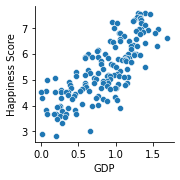

In [119]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'GDP' ,data = df)


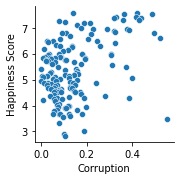

In [120]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Corruption' ,data = df)

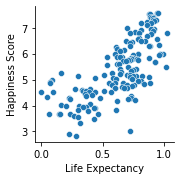

In [121]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Life Expectancy' ,data = df)

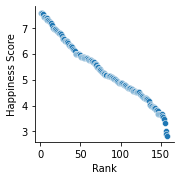

In [122]:
sns.pairplot(y_vars ='Happiness Score', x_vars = 'Rank' ,data = df)

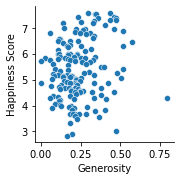

In [123]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Generosity' ,data = df)

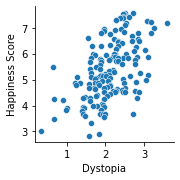

In [124]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Dystopia' ,data = df)

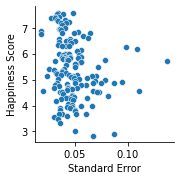

In [125]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Standard Error' ,data = df)

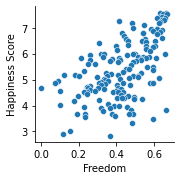

In [126]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Freedom' ,data = df)

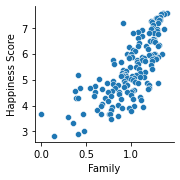

In [127]:
sns.pairplot(y_vars = 'Happiness Score', x_vars = 'Family' ,data = df)

In [128]:
GDP_Region=df.groupby('Region')['GDP'].sum()

In [129]:
GDP_Region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP, dtype: float64

Text(0.5, 1.0, 'GDP by Region')

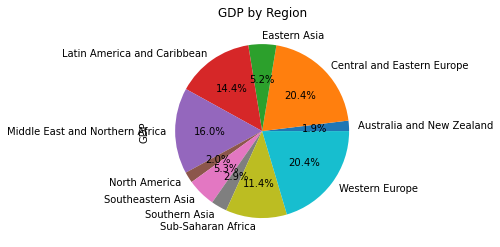

In [130]:
GDP_Region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by Region')

In [131]:
total_Country=df.groupby('Region')[['Country']].count()
print(total_Country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


<AxesSubplot:>

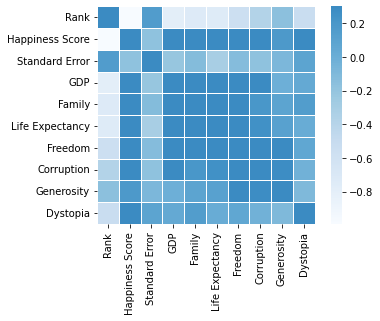

In [132]:
cor=df.corr(method="pearson")
cmap = sns.diverging_palette(220, 10, as_cmap="TRUE")
sns.heatmap(df[["Country","Region","Rank","Happiness Score","Standard Error","GDP","Family","Life Expectancy","Freedom","Corruption","Generosity","Dystopia"]].corr(),vmax=.3, center=0, cmap="Blues",
            square=True, linewidths=.5,cbar_kws={"shrink": 1})


In [133]:
Corruption=df.groupby('Region')[['Corruption']].mean()
Corruption

,Corruption
Region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

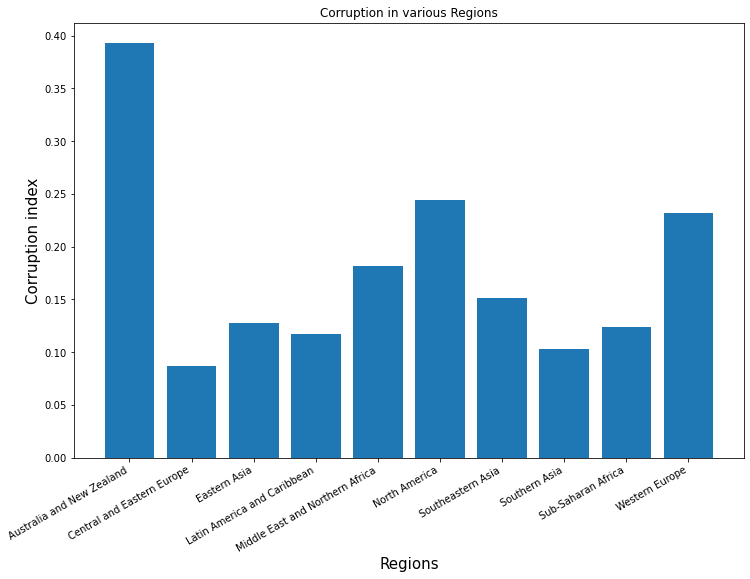

In [134]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Corruption in various Regions')
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Corruption index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(Corruption.index,Corruption.Corruption)

In [135]:
top_10=df.head(10)
bottom_10=df.tail(10)

In [136]:
for index,value in df[['Happiness Score']][:20].iterrows():
    print(index," : ",value)

0  :  Happiness Score    7.587
Name: 0, dtype: float64
1  :  Happiness Score    7.561
Name: 1, dtype: float64
2  :  Happiness Score    7.527
Name: 2, dtype: float64
3  :  Happiness Score    7.522
Name: 3, dtype: float64
4  :  Happiness Score    7.427
Name: 4, dtype: float64
5  :  Happiness Score    7.406
Name: 5, dtype: float64
6  :  Happiness Score    7.378
Name: 6, dtype: float64
7  :  Happiness Score    7.364
Name: 7, dtype: float64
8  :  Happiness Score    7.286
Name: 8, dtype: float64
9  :  Happiness Score    7.284
Name: 9, dtype: float64
10  :  Happiness Score    7.278
Name: 10, dtype: float64
11  :  Happiness Score    7.226
Name: 11, dtype: float64
12  :  Happiness Score    7.2
Name: 12, dtype: float64
13  :  Happiness Score    7.187
Name: 13, dtype: float64
14  :  Happiness Score    7.119
Name: 14, dtype: float64
15  :  Happiness Score    6.983
Name: 15, dtype: float64
16  :  Happiness Score    6.946
Name: 16, dtype: float64
17  :  Happiness Score    6.94
Name: 17, dtype: float